# Cluster Profiles

Through data integration, feature engineering, and clustering analysis, Berlin’s subdistricts naturally grouped into four distinct lifestyle profiles. 

Each cluster reflects a different balance of affordability, population size, and amenity density, giving residents and newcomers clear guidance on where to live depending on budget and lifestyle preferences.

`Key Takeaways`

* **Affordability vs. Amenities**: Lower-rent areas (Clusters 0 & 2) generally have fewer cafés, nightlife, and services, while higher-rent areas (Clusters 1 & 3) are rich in amenities.

* **Population Distribution**: Cluster 1 subdistricts stand out as major hubs with very large populations, while Cluster 0 captures smaller, quieter neighborhoods.

* **Green Space & Family-Friendliness**: Cluster 1 provides the most green space and schools, aligning well with family needs.

* **Prestige & Vibrancy**: Cluster 3 combines the highest incomes, rents, and density of nightlife and cultural amenities, representing Berlin’s trendiest, wealthiest hotspots.

* **Balanced Choices**: Cluster 2 offers affordability in mid-sized neighborhoods with moderate amenities — attractive for working-class and peripheral residents.

`Final Cluster Profiles`

* **Cluster 0 – Affordable**

  Quiet, small, affordable suburban subdistricts with limited amenities. Best suited for families or individuals seeking calm + lower rents.

* **Cluster 1 – Vibrant**

  Large, amenity-rich, centrally affordable hubs with high populations, green space, and schools. Represents Berlin’s vibrant core neighborhoods.

* **Cluster 2 – Balanced**

  Mid-sized, affordable areas with fewer amenities. Attractive for affordability seekers who don’t mind fewer cultural and social offerings.

* **Cluster 3 – Prestige**

  Wealthy, trendy, high-rent subdistricts with dense cafés, restaurants, nightlife, and strong cultural appeal.

`Final Summary`

* **Cluster 0**: Affordable – Quiet, small, suburban, modest amenities, lower rents.

* **Cluster 1**: Vibrant – Big, lively, centrally affordable, green and family-friendly.

* **Cluster 2**: Balanced – Affordable mid-sized areas with moderate services.

* **Cluster 3**: Prestige – Wealthy, trendy, high-rent, culturally dense hotspots.

These profiles form the foundation of the Berlin Housing Explorer app, helping users not only answer “Where can I afford to live?” but also “Which Berlin neighborhood fits my lifestyle?”


# Environment & Data

This section includes the notebook set up with imports, data loading, and helper functions.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Data
CLUSTERS_CSV = "../data/processed/final_master_with_k4_clusters.csv"
df = pd.read_csv(CLUSTERS_CSV)

# Vizualization settings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette("Reds")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Perform KMeans clustering with 4 clusters
#kmeans_4 = KMeans(n_clusters=4, random_state=42)
#labels_4 = kmeans_4.fit_predict(X)

# Create a copy to compare both clusterings
#df_clusters = dfp[[id_col]].copy()
#df_clusters["k4_cluster"] = labels_4

In [3]:
# Add ortsteil back to your PCA dataframe
#df_pca = pd.DataFrame(X, columns=[f"PC{i+1}" for i in range(X.shape[1])])
#dfp["ortsteil"] = ids.values  

# Add cluster labels
#dfp["k4_cluster"] = kmeans_4.labels_

# Merge cluster labels into master table
#df_clustered = df.merge(
 #   dfp[["ortsteil", "k4_cluster"]],
  #  on="ortsteil"
#)

In [ ]:
# Utils
# Plot radar chart
def plot_radar_chart(cluster_id, scaled_profiles, features):
    values = scaled_profiles.loc[cluster_id].values
    N = len(features)

    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    values = np.concatenate((values,[values[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, rotation=45, ha="right")
    ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
    ax.set_yticklabels(["0.2","0.4","0.6","0.8","1.0"])
    ax.set_title(f"Cluster {cluster_id}: Profile Overview", size=14, pad=20)
    plt.show()

# Choose a few key features
features = [
    "subdistrict_avg_median_income_eur",
    "subdistrict_avg_mietspiegel_classification",
    "total_population",
    "subdistrict_youth_share",
    "subdistrict_senior_share",
    "cafes",
    "bar",
    "restaurant",
    "nightclub",
    "supermarket",
    "subdistrict_middle_age_population",
    "green_space",
    "schools",

]

# Plot cluster bars
def plot_cluster_bars(merged, cluster_col, metric, x_label, y_label, title="Cluster Comparison"):
    # Group by cluster and compute mean
    grouped = merged.groupby(cluster_col)[metric].mean().reset_index()
    
    # Map cluster numbers to names
    grouped[cluster_col] = grouped[cluster_col]
    
    # Plot
    plt.figure(figsize=(12,6))
    sns.barplot(data=grouped, x=cluster_col, y=metric, hue=cluster_col, palette="Reds", dodge=False)
    plt.title(title)
    plt.xlabel("")
    plt.ylabel(y_label)
    plt.legend([],[], frameon=False)  # remove duplicate legend
    plt.show()

# Clusters Overview

In [7]:
# Number of subdistricts per cluster
print(df["k4_cluster"].value_counts().sort_index())

k4_cluster
0    57
1     5
2    32
3     2
Name: count, dtype: int64


🔖 **Key Insights - Cluster Distribution**

There are 4 distinct clusters with one cluster containing most of the subdistrict and a cluster containing only 2 districsts. This suggest there are 2 subdistricts that are distinct from the other 94 subdistricts.

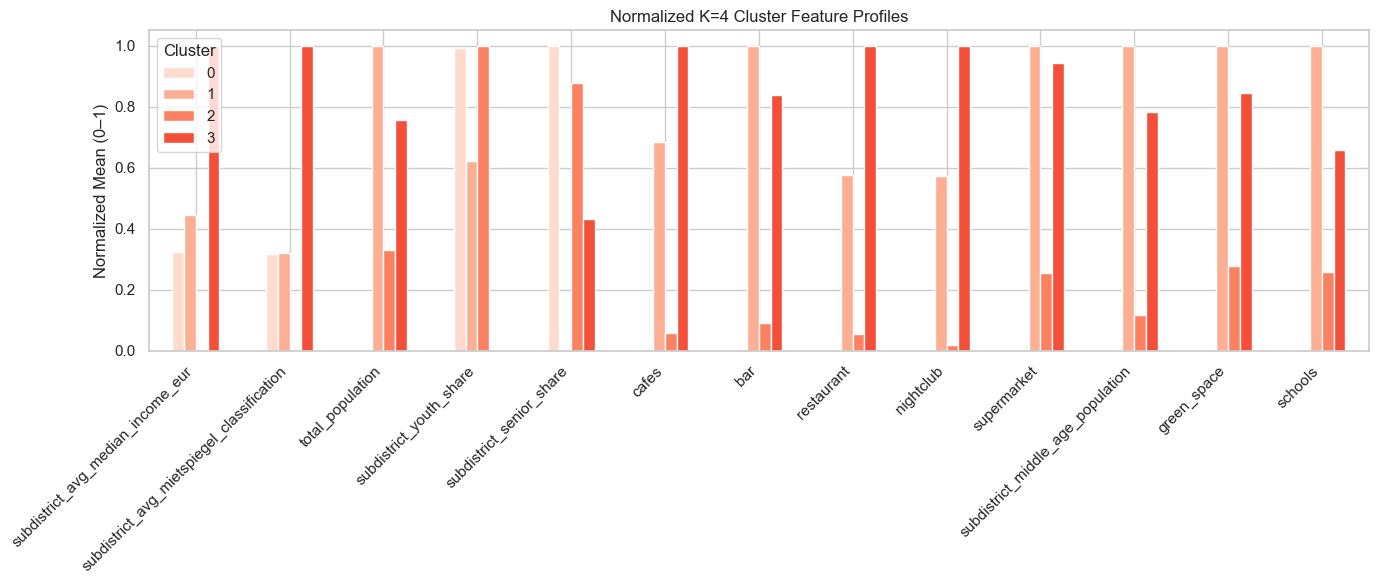

In [8]:
# Group original data by k=4 clusters
k4_profiles = df.groupby("k4_cluster").mean(numeric_only=True)

# Scale only the numeric cluster means
scaler = MinMaxScaler()
k4_scaled = pd.DataFrame(
    scaler.fit_transform(k4_profiles[features]),
    columns=features,
    index=k4_profiles.index
)

# Plot
k4_scaled.T.plot(kind="bar", figsize=(14, 6))
plt.title("Normalized K=4 Cluster Feature Profiles")
plt.ylabel("Normalized Mean (0–1)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Cluster")
plt.show()

In [9]:
k4_profiles[features].round(1).T

k4_cluster,0,1,2,3
subdistrict_avg_median_income_eur,4100.4,4178.0,3890.2,4537.2
subdistrict_avg_mietspiegel_classification,1.9,1.9,1.7,2.5
total_population,15438.9,148427.2,59540.7,115848.5
subdistrict_youth_share,0.2,0.2,0.2,0.1
subdistrict_senior_share,0.2,0.1,0.2,0.2
cafes,5.3,185.4,20.5,268.5
bar,1.4,86.2,9.0,72.5
restaurant,13.0,306.4,41.8,522.0
nightclub,0.2,13.0,0.6,22.5
supermarket,5.6,60.2,19.5,57.0


🔖 **Key Insights**

* Cluster 0: Low across most amenities, mid-range on demographics → quieter, less dense, fewer services.

* Cluster 1: Very high population, strong green space, schools, supermarkets → family-oriented and dense.

* Cluster 2: Middle values but weaker in POIs → affordable but less vibrant.

* Cluster 3: High income, high Mietspiegel, very dense nightlife and amenities → central & prestigious.


# Clusters Key Metrics Comparison

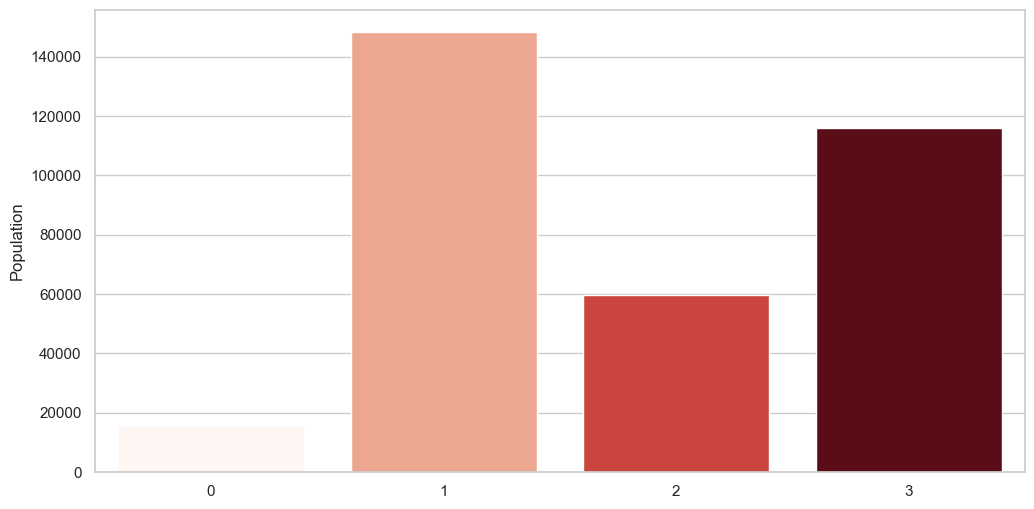

In [10]:
plot_cluster_bars(df, "k4_cluster", "total_population",
                  x_label="Clusters", y_label="Population", title="")

🔖 **Key Insights - Population**

* Cluster 1 dominates with the largest average subdistrict population (~150k).

* Cluster 0 is very small in population (quiet, low-density areas).

* Clusters 2 and 3 are mid-sized (~60k–115k).

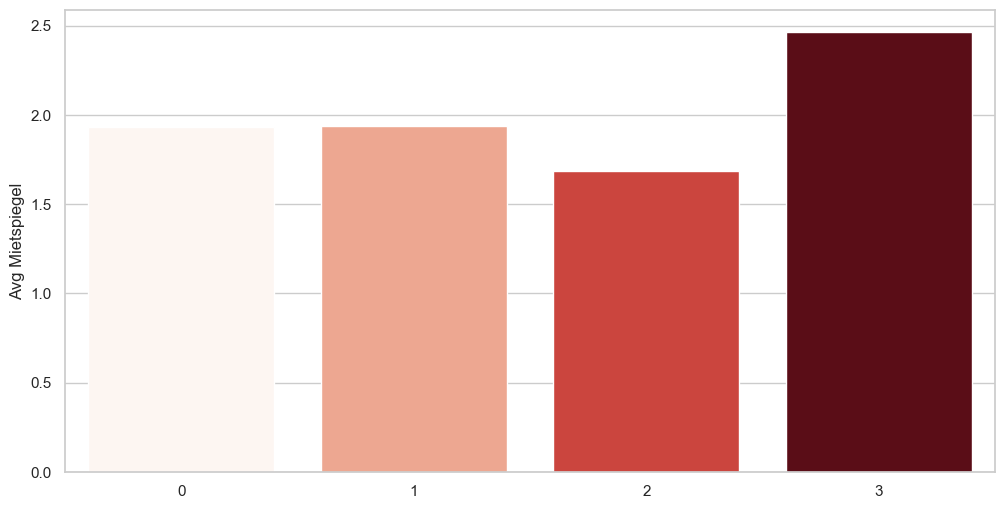

In [11]:
plot_cluster_bars(df, "k4_cluster", "subdistrict_avg_mietspiegel_classification",
                  x_label="Clusters", y_label="Avg Mietspiegel",
                  title="")

🔖 **Key Insights - Mietspiegel Classification**

* Cluster 3 has the highest Mietspiegel (avg ~2.5), clearly the most expensive.

* Cluster 2 is lowest (~1.7), aligning with affordability.

* Clusters 0 and 1 hover around ~1.9, moderate rents.

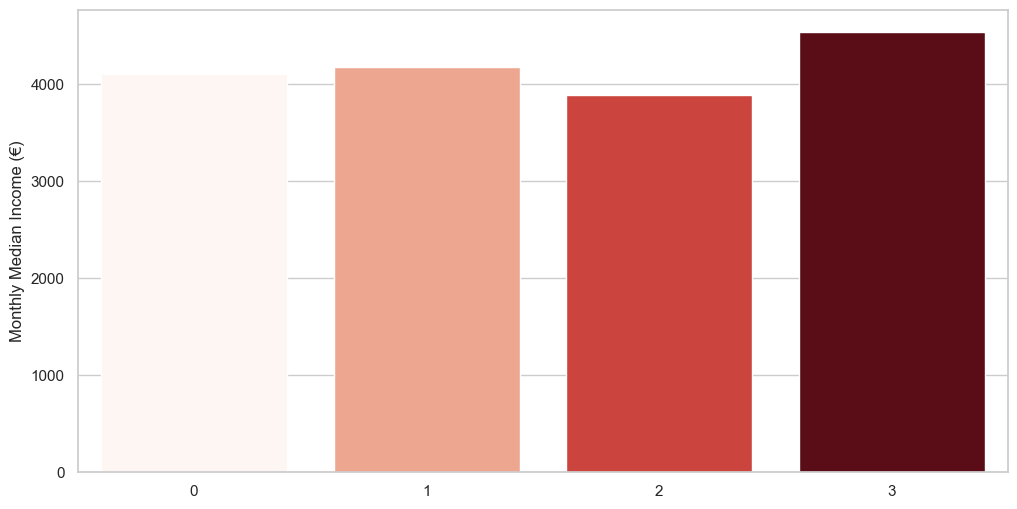

In [12]:
plot_cluster_bars(df, "k4_cluster", "subdistrict_avg_median_income_eur",
                  x_label="Clusters", y_label="Monthly Median Income (€)",
                  title="")

🔖 **Key Insights - Median Income**

* Cluster 3 also leads on income (~€4,537), confirming prestige/affluence.

* Cluster 2 has the lowest (~€3,890), consistent with affordability.

* Clusters 0 and 1 are mid-range (€4,100–4,178).

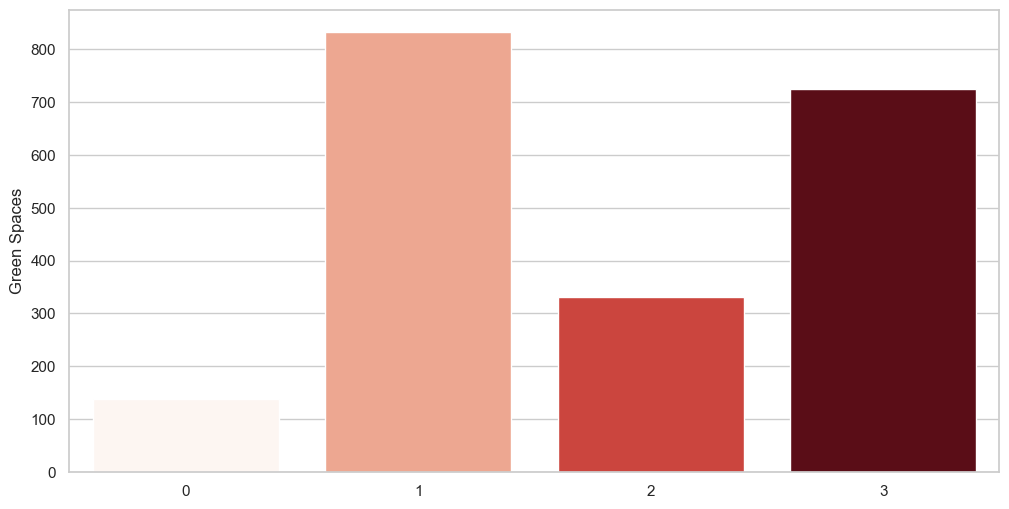

In [13]:
plot_cluster_bars(df, "k4_cluster", "green_space",
                  x_label="Clusters", y_label="Green Spaces",
                  title="")

🔖 **Key Insights - Green Spaces**

* Cluster 1 has the highest green space (~833 ha), making it family- and nature-friendly.

* Cluster 0 has very little (~138 ha), reinforcing its small, low-service nature.

* Cluster 3 also scores high (~724 ha), adding prestige value.

* Cluster 2 sits in between (~332 ha).

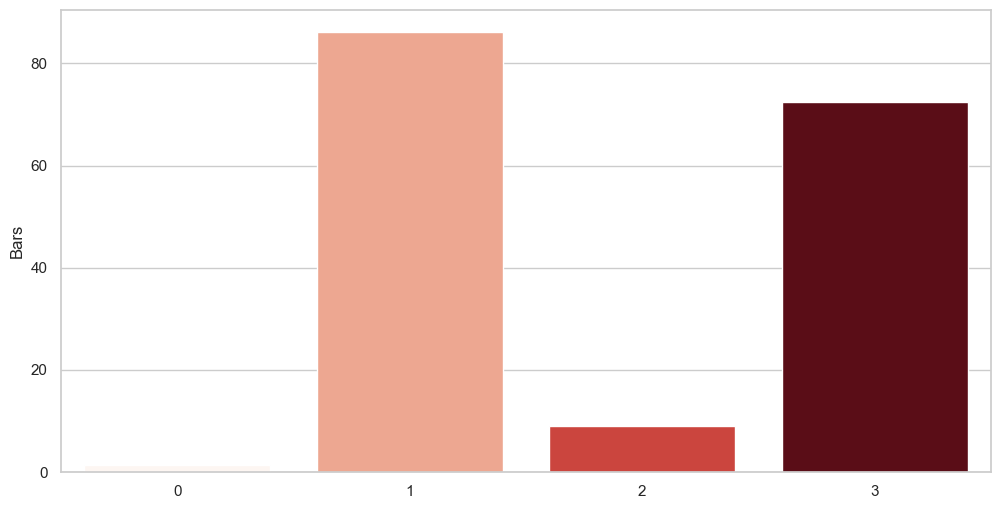

In [14]:
key_metrics = ["bar", "cafes", "restaurant", "nightclub"]
plot_cluster_bars(df, "k4_cluster", "bar",
                  x_label="Clusters", y_label="Bars",
                  title="")

🔖 **Key Insights - Bars**

* Cluster 1 and 3 dominate nightlife, with ~86 and ~72 bars respectively.

* Cluster 0 is nearly bar-free → very quiet.

* Cluster 2 has few (~9).

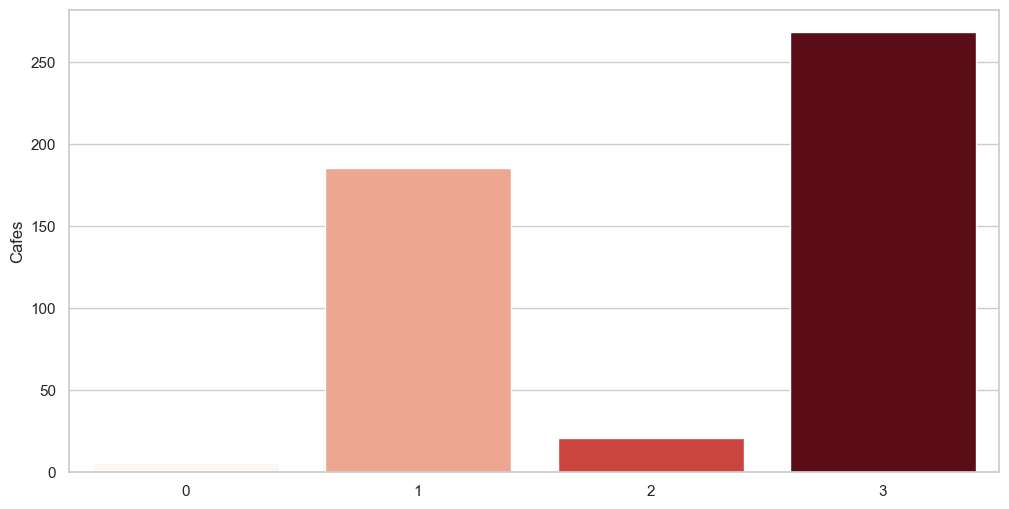

In [15]:
plot_cluster_bars(df, "k4_cluster", "cafes",
                  x_label="Clusters", y_label="Cafes",
                  title="")

🔖 **Key Insights - Cafes**

* Cluster 3 is the café hub (~269).

* Cluster 1 also has many (~185).

* Cluster 2 has some (~20), but Cluster 0 has nearly none (~5).

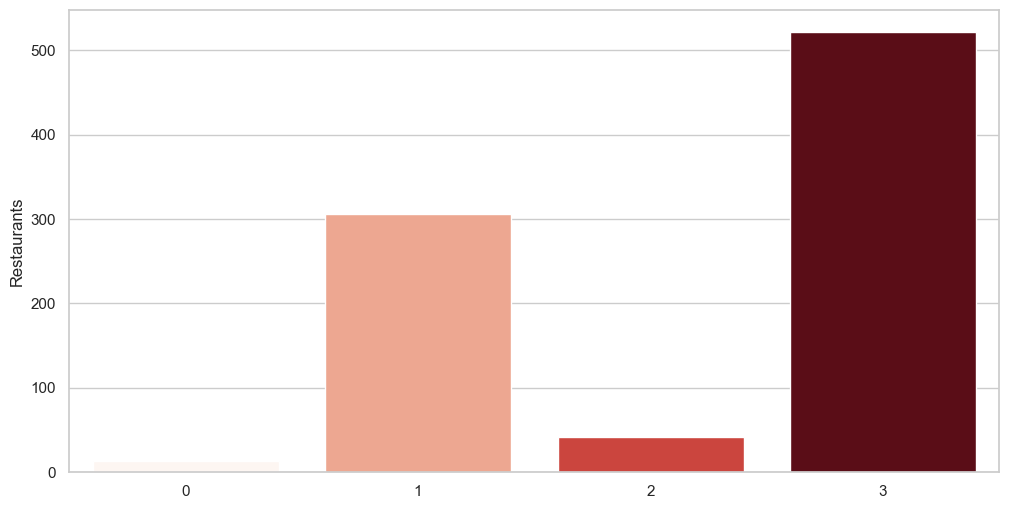

In [16]:
plot_cluster_bars(df, "k4_cluster", "restaurant",
                  x_label="Clusters", y_label="Restaurants",
                  title="")

🔖 **Key Insights - Restaurants**

* Cluster 3 leads again (~522), followed by Cluster 1 (~306).

* Cluster 2 (42) and 0 (13) are far behind, showing lower food culture density.

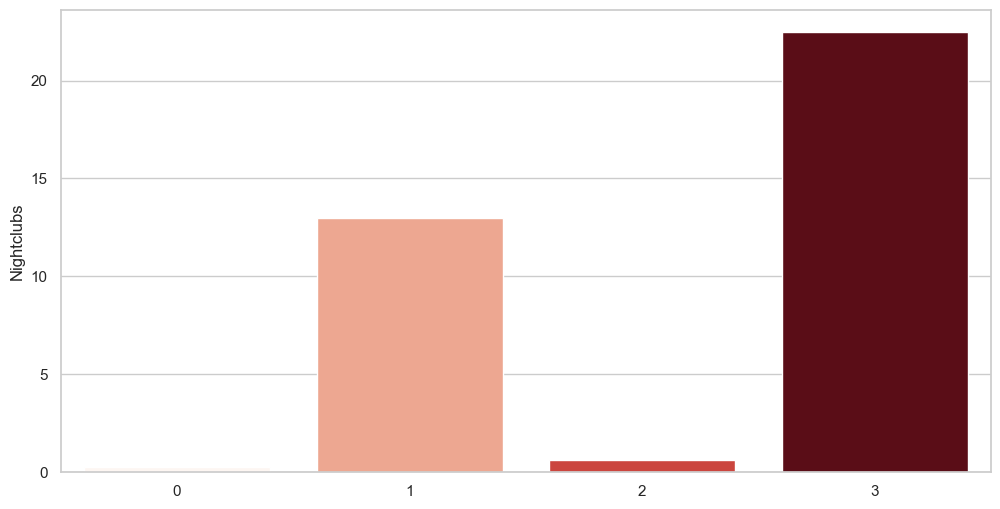

In [17]:
plot_cluster_bars(df, "k4_cluster", "nightclub",
                  x_label="Clusters", y_label="Nightclubs",
                  title="")

🔖 **Key Insights - Nightclubs**

* Cluster 3 has the most (~23), with Cluster 1 also significant (~13).

* Cluster 0 essentially none, Cluster 2 very few (~1).

→ Splits Berlin into vibrant vs. quiet living options.

# Subdistrict Clusters Profiles

## Cluster 0 

**Small, Balanced Subdistricts (57 subdistricts)**

* Population: Smallest (~15k average), more local/quiet neighborhoods.

* Demographics: Balanced youth and senior share (~20% each), middle-aged relatively lower.

* Income: ~€4,100 median – average affordability.

* Housing: Mietspiegel ~1.9 → lower-to-mid rent level.

* Amenities: Very few cafés, bars, restaurants, or supermarkets.

* Green space: Limited (~138 ha).

* Schools: Low (~16).

➡️ `Profile`: 

Suburban/quiet residential areas with modest incomes, limited nightlife & amenities, but affordable rents. Likely attractive for families wanting calm + affordability.

➡️ `Subdistricts`: 

Adlershof, Alt-treptow, Altglienicke, Baumschulenweg, Biesdorf, Blankenburg, Blankenfelde, Bohnsdorf, Borsigwalde, Buch, Charlottenburg-Nord, Dahlem, Falkenberg, Fennpfuhl, Französisch Buchholz, Friedenau, Friedrichshagen, Frohnau, Gatow, Grunewald, Grünau, Hakenfelde, Halensee, Hansaviertel, Haselhorst, Heiligensee, Heinersdorf, Hermsdorf, Johannisthal, Karlshorst, Karow, Kaulsdorf, Kladow, Konradshöhe, Lübars, Mahlsdorf, Malchow, Marienfelde, Müggelheim, Niederschöneweide, Niederschönhausen, Nikolassee, Oberschöneweide, Plänterwald, Rahnsdorf, Rosenthal, Rummelsburg, Schmargendorf, Schmöckwitz, Siemensstadt, Stadtrandsiedlung Malchow, Tiergarten, Waidmannslust, Wannsee, Wartenberg, Wilhelmsruh, Wittenau

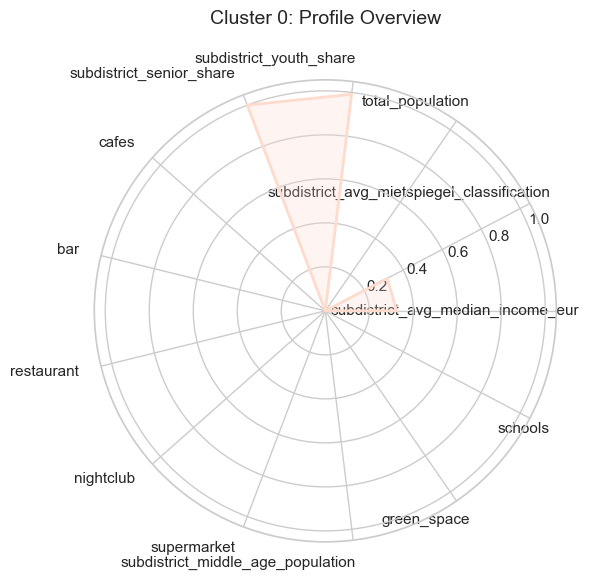

In [18]:
plot_radar_chart(0, k4_scaled, features)

In [19]:
# subdistict list of cluster 0
subdistricts_cluster_0 = df[df["k4_cluster"] == 0]["ortsteil"].tolist()
print("Subdistricts in Cluster 0:", subdistricts_cluster_0)

Subdistricts in Cluster 0: ['adlershof', 'alt-treptow', 'altglienicke', 'baumschulenweg', 'biesdorf', 'blankenburg', 'blankenfelde', 'bohnsdorf', 'borsigwalde', 'buch', 'charlottenburg-nord', 'dahlem', 'falkenberg', 'fennpfuhl', 'franzoesisch buchholz', 'friedenau', 'friedrichshagen', 'frohnau', 'gatow', 'grunewald', 'gruenau', 'hakenfelde', 'halensee', 'hansaviertel', 'haselhorst', 'heiligensee', 'heinersdorf', 'hermsdorf', 'johannisthal', 'karlshorst', 'karow', 'kaulsdorf', 'kladow', 'konradshoehe', 'luebars', 'mahlsdorf', 'malchow', 'marienfelde', 'mueggelheim', 'niederschoeneweide', 'niederschoenhausen', 'nikolassee', 'oberschoeneweide', 'plaenterwald', 'rahnsdorf', 'rosenthal', 'rummelsburg', 'schmargendorf', 'schmoeckwitz', 'siemensstadt', 'stadtrandsiedlung malchow', 'tiergarten', 'waidmannslust', 'wannsee', 'wartenberg', 'wilhelmsruh', 'wittenau']


## Cluster 1

**Large, Amenity-Rich Districts (5 subdistricts)**

* Population: Very high (~148k average) – major hubs.

* Demographics: Slightly younger skew (lower senior share).

* Income: ~€4,200 median – average affordability.

* Housing: Mietspiegel ~1.9 → affordable-to-mid rents.

* Amenities: High density of cafés (~185), bars (~86), restaurants (~306).

* Green space: Largest (~833 ha).

* Schools: High (~155).

➡️ `Profile`: 

Central, highly urban subdistricts with lots of social & cultural infrastructure, large populations, and good affordability. Likely Berlin’s vibrant core neighborhoods.

➡️ `Subdistricts`: 

Friedrichshain, Kreuzberg, Neukölln, Prenzlauer berg, and Schöneberg

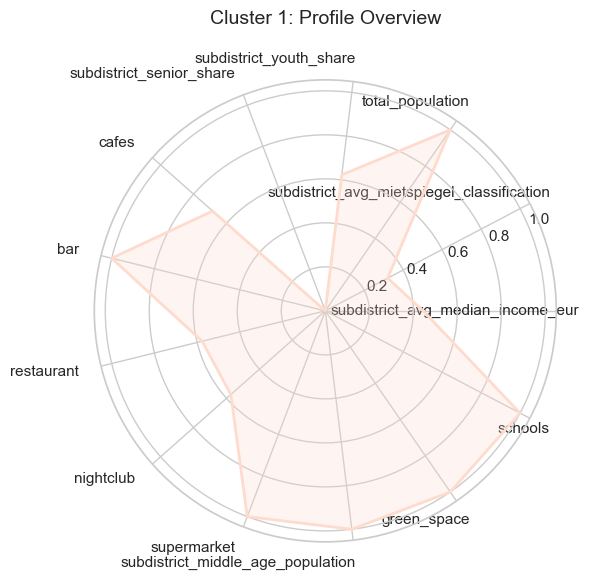

In [20]:
plot_radar_chart(1, k4_scaled, features)

In [21]:
# subdistict list of cluster 1
subdistricts_cluster_1 = df[df["k4_cluster"] == 1]["ortsteil"].tolist()
print("Subdistricts in Cluster 1:", subdistricts_cluster_1)

Subdistricts in Cluster 1: ['friedrichshain', 'kreuzberg', 'neukoelln', 'prenzlauer berg', 'schoeneberg']


## Cluster 2

**Mid-Sized, Affordable Areas (32 subdistricts)**

* Population: Medium (~59k).

* Demographics: Balanced youth/senior (~20%).

* Income: Lowest (~€3,900 median).

* Housing: Mietspiegel ~1.7 → most affordable rents.

* Amenities: Low-to-moderate cafés (~20), bars (~9), restaurants (~42).

* Green space: Moderate (~332 ha).

* chools: Moderate (~52).

➡️ `Profile`: 

Affordable, mid-sized neighborhoods with fewer amenities. Likely working-class or peripheral subdistricts, attractive for affordability seekers.

➡️ `Subdistricts`: 

Alt-hohenschönhausen, Britz, Buckow, Falkenhagener Feld, Friedrichsfelde, Gesundbrunnen, Gropiusstadt, Hellersdorf, Köpenick, Lankwitz, Lichtenberg, Lichtenrade, Lichterfelde, Mariendorf, Marzahn, Moabit, Märkisches Viertel, Neu-Hohenschönhausen, Pankow, Reinickendorf, Rudow, Spandau, Staaken, Steglitz, Tegel, Tempelhof, Wedding, Weissensee, Westend, Wilhelmstadt, Wilmersdorf, and Zehlendorf

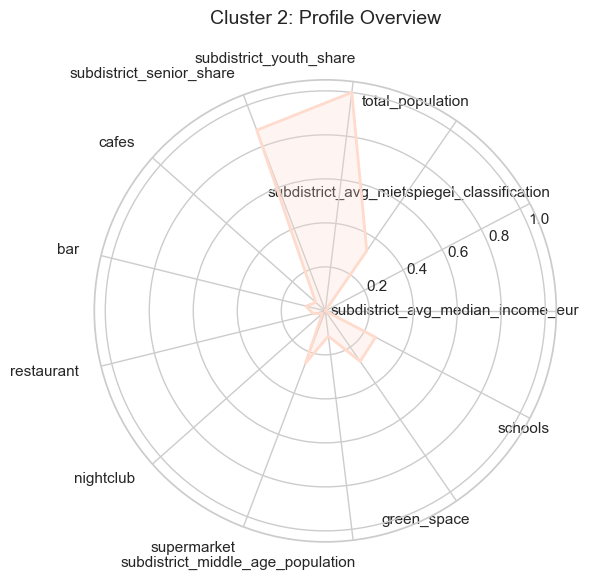

In [22]:
plot_radar_chart(2, k4_scaled, features)

In [23]:
# subdistict list of cluster 2
subdistricts_cluster_2 = df[df["k4_cluster"] == 2]["ortsteil"].tolist()
print("Subdistricts in Cluster 2:", subdistricts_cluster_2)

Subdistricts in Cluster 2: ['alt-hohenschoenhausen', 'britz', 'buckow', 'falkenhagener feld', 'friedrichsfelde', 'gesundbrunnen', 'gropiusstadt', 'hellersdorf', 'koepenick', 'lankwitz', 'lichtenberg', 'lichtenrade', 'lichterfelde', 'mariendorf', 'marzahn', 'moabit', 'maerkisches viertel', 'neu-hohenschoenhausen', 'pankow', 'reinickendorf', 'rudow', 'spandau', 'staaken', 'steglitz', 'tegel', 'tempelhof', 'wedding', 'weissensee', 'westend', 'wilhelmstadt', 'wilmersdorf', 'zehlendorf']


## Cluster 3

**Wealthy, High-Amenity Areas (2 subdistricts)**

* Population: Large (~116k average).

* Demographics: Slightly lower youth share, higher senior share.

* Income: Highest (~€4,500 median).

* Housing: Mietspiegel ~2.5 → most expensive rents.

* Amenities: Highest density – cafés (~269), bars (~73), restaurants (~522), nightclubs (~23).

* Green space: High (~724 ha).

* Schools: Moderate-high (~108).

➡️ `Profile`: 

Affluent, vibrant subdistricts with high rents and many amenities. Likely trendy/wealthy hotspots (e.g. Charlottenburg/Mitte type areas).

➡️ `Subdistricts`: 

Charlottenburg and Mitte

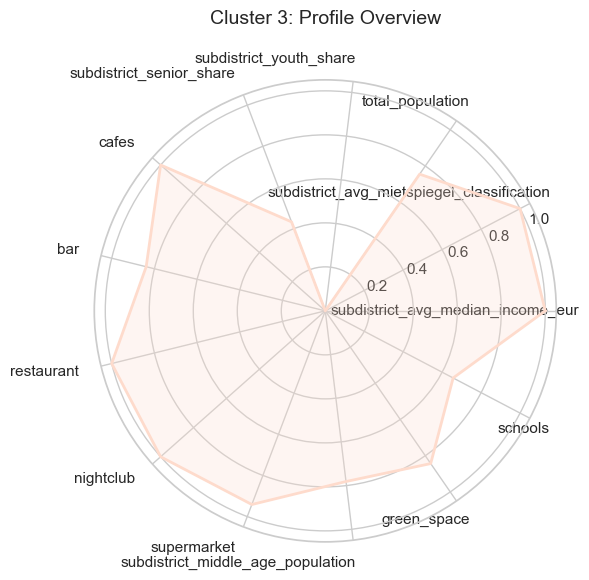

In [24]:
plot_radar_chart(3, k4_scaled, features)

In [25]:
# subdistict list of cluster 3
subdistricts_cluster_3 = df[df["k4_cluster"] == 3]["ortsteil"].tolist()
print("Subdistricts in Cluster 3:", subdistricts_cluster_3)

Subdistricts in Cluster 3: ['charlottenburg', 'mitte']
